# Assignment 4

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [37]:
NAME = "Adriel Naranjo"
STUDENT_ID = "1676622"

In [38]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd


## Data Exploration and Preprocessing

### Load the Fashion-MNIST dataset
Keras has lots of datsets that you can just load right into python numpy arrays, see: https://keras.io/datasets/

We will be using the Fashion-MNIST dataset, which is a cool little dataset with gray scale $28\times28$ images of articles of clothing.
Keep in mind that they will be downloaded from the internet, so it may take a while.

In [39]:
fashion_mnist = keras.datasets.fashion_mnist
# splitting training and test data and corresponding labels 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_dict = {i:class_name for i,class_name in enumerate(class_names)}

In [41]:
def show_image(index):
    plt.figure()
    # cmap=plt.cm.binary allows us to show the picture in grayscale
    plt.imshow(train_images[index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[index]])
    plt.colorbar() # adds a bar to the side with values
    plt.show()

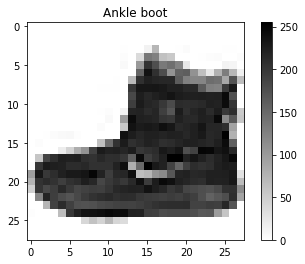

In [42]:
show_image(0)

## Question 1: Data Preprocessing
As you can see above, the images are valued from $[0,255]$. This is the normal range for images. Recall from the previous lectures and excercises that we need to normalize our data.

In order to normalize our data to $[0,1]$ we use the equation:

$$x_{norm}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

In our case we can assume that $x_{min}=0$ and $x_{max}=255$, this is a safe assumption since we are working with image data.

This means that for image data, if we want to normlize to $[0,1]$ the equation simplifies to:

$$img_{norm}=\frac{img}{255}$$

Anytime you work with image data in any kind of model you will be normalizing with this equation. Unless the range you want to normalize is different. Sometimes you want to normalize between $[-1,1]$, for that you would use a slightly different equation.




### Question 1.1) Normalizing the data
Normalize BOTH the training and testing images using the above equation.

In [43]:
# Normalizing function 
def normalize_data(data):
    return (data - np.min(data))/(np.max(data) - np.min(data))

# List Comprehensions to normalize train and testing images 
train_images = [normalize_data(image) for image in train_images]
test_images = [normalize_data(image) for image in test_images]

# Turn into np arrays 
train_images = np.array(train_images)
test_images = np.array(test_images)





If we show the image again, you will see the values are all scaled correctly.

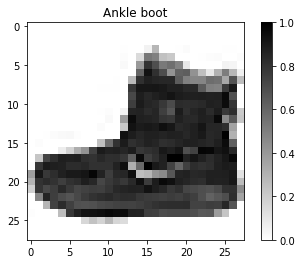

In [44]:
show_image(0)

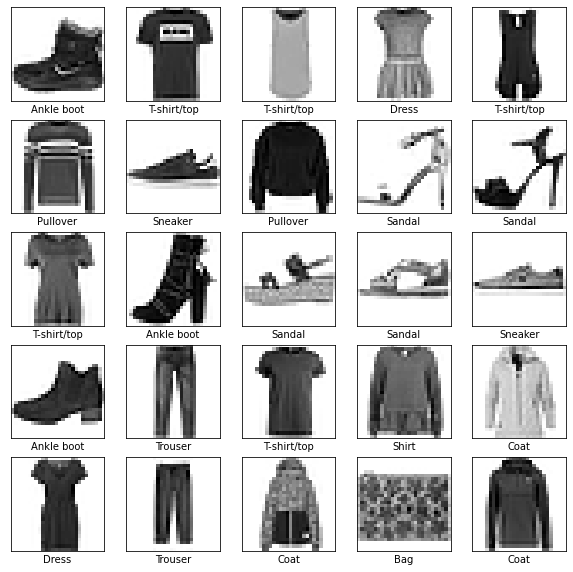

In [45]:
# Lets sample our data to see what kind of images are stored.
# see documentation for subplot here:
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Question 1.2) Data Transformation
Since our data is composed of grayscale images (one channel) with a resolution of $28\times28$, we can think of this as the images existing in a $28\times28=784$ dimensional space. This means that every single image in our dataset can be represented by a vector of length $784$.

Please reshape BOTH the training and testing images to be $784D$. 

Hint: look into numpy.reshape().


In [46]:


print(f'Before reshape, train_images shape: {train_images.shape} test_images shape: {test_images.shape}')


# reshape, use -1 to 'combine' dimensions
train_images = np.reshape(train_images,newshape=(60000,-1))
test_images = np.reshape(test_images, newshape=(10000,-1))

# add new dimension to both 
# train_images = np.reshape(train_images, (train_images.shape + (1,)))
# test_images = np.reshape(test_images, (test_images.shape + (1,)))

print(f'After reshape, train_images shape: {train_images.shape} test_images shape: {test_images.shape}')

Before reshape, train_images shape: (60000, 28, 28) test_images shape: (10000, 28, 28)
After reshape, train_images shape: (60000, 784) test_images shape: (10000, 784)


We create a dataframe using our training and testing data to keep everything tidy.

In [47]:
# Add training data into a dataframe
img_data = {f"z{i}":train_images[:,i] for i in range(784)}
img_data["label"] = train_labels
df_img_train = pd.DataFrame(img_data)
df_img_train["class"] = df_img_train["label"].map(class_dict)
df_img_train.head()

,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37,z38,z39,...,z746,z747,z748,z749,z750,z751,z752,z753,z754,z755,z756,z757,z758,z759,z760,z761,z762,z763,z764,z765,z766,z767,z768,z769,z770,z771,z772,z773,z774,z775,z776,z777,z778,z779,z780,z781,z782,z783,label,class
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9,Ankle boot
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,0.160784,0.737255,0.403922,0.211765,0.188235,0.168627,0.341176,0.658824,0.521569,0.062745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.192157,0.533333,0.858824,0.847059,0.894118,...,0.952941,0.839216,0.878431,0.635294,0.000000,0.007843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.0,0.545098,0.572549,0.509804,0.529412,0.529412,0.537255,0.490196,0.486275,0.490196,0.474510,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,0.462745,0.094118,0.000000,0.000000,0.000000,0.000000,0.000000,0.188235,0.345098,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.047059,0.392157,0.831373,0.803922,...,0.294118,0.039216,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003922,0.000000,0.000000,0.000000,0.070588,0.164706,0.223529,0.219608,0.125490,0.031373,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,0.686275,0.611765,0.250980,0.054902,0.211765,0.537255,0.800000,0.760784,0.400000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.286275,0.729412,0.694118,0.717647,0.686275,0.737255,...,0.333333,0.627451,0.521569,0.392157,0.047059,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015686,0.0,0.007843,0.000000,0.137255,0.015686,0.129412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3,Dress
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101961,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.741176,0.807843,0.733333,0.125490,...,1.000000,0.274510,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.239216,0.400000,0.658824,0.098039,0.000000,0.545098,0.631373,0.290196,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,T-shirt/top


In [48]:
# Add test data into a dataframe
img_data = {f"z{i}":test_images[:,i] for i in range(784)}
img_data["label"] = test_labels
df_img_test = pd.DataFrame(img_data)
df_img_test["class"] = df_img_test["label"].map(class_dict)
df_img_test.head()



,z0,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17,z18,z19,z20,z21,z22,z23,z24,z25,z26,z27,z28,z29,z30,z31,z32,z33,z34,z35,z36,z37,z38,z39,...,z746,z747,z748,z749,z750,z751,z752,z753,z754,z755,z756,z757,z758,z759,z760,z761,z762,z763,z764,z765,z766,z767,z768,z769,z770,z771,z772,z773,z774,z775,z776,z777,z778,z779,z780,z781,z782,z783,label,class
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,9,Ankle boot
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.050980,0.262745,0.000000,0.000000,0.000000,0.000000,0.196078,0.149020,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.031373,0.470588,0.819608,0.886275,0.968627,...,0.000000,0.000000,0.000000,0.152941,0.976471,1.0,0.482353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192157,0.803922,0.772549,0.043137,0.0,0.015686,0.003922,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,2,Pullover
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,0.262745,0.694118,0.505882,0.600000,0.458824,0.505882,0.572549,0.552941,0.686275,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.007843,0.000000,0.768627,1.000000,...,0.988235,0.466667,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.384314,0.623529,0.278431,0.000000,0.000000,0.266667,0.690196,0.643137,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,Trouser
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,0.482353,0.423529,0.388235,0.388235,0.329412,0.325490,0.337255,0.360784,0.274510,0.023529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.415686,0.972549,0.901961,...,0.180392,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.078431,0.682353,0.396078,0.000000,0.000000,0.000000,0.572549,0.572549,0.003922,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,Trouser
4,0.0,0.0,0.0,0.007874,0.0,0.003937,0.003937,0.0,0.000000,0.000000,0.000000,0.224409,0.263780,0.287402,0.299213,0.299213,0.326772,0.244094,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003937,0.003937,0.003937,0.0,0.000000,0.051181,0.311024,0.503937,0.791339,...,0.775591,0.716535,0.637795,0.240157,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.118110,0.283465,0.374016,0.429134,0.437008,0.437008,0.417323,0.397638,0.279528,0.047244,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,6,Shirt


Now we have our data reshaped into the $784D$ vectors, we can classify the images using a feed forward artifical neural network.



## Question 2: Neural Network
In this question we will build different neural network models. 

### Question 2.1) Pullovers vs. Coats. 

Build a neural network to your liking and train it for 50 epochs with a 0.2 train/validation split. You will want to use binary cross entropy ("bce") loss as the loss function. See if you can tune your model to achieve 70% accuracy.

In [49]:
from tensorflow.keras.layers import Input, Dense # only use these layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import * # you can use any optimizer


def build_model():
  model = Sequential() 
  model.add(Dense(units=784, input_dim=784, activation='tanh'))
  model.add(Dense(units=784, activation='tanh'))
  model.add(Dense(units=784, activation='tanh'))
  model.add(Dense(units=1, activation='sigmoid'))
  return model

In [50]:
# Show a summary of your model
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_19 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_20 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 785       
Total params: 1,847,105
Trainable params: 1,847,105
Non-trainable params: 0
_________________________________________________________________


In [51]:
# A function for getting a subset of the data
def get_data_subset(df, classes=[], shuffle=True, shuffle_seed=42):
    """
    Used to retrieve columns from df
    """
    if classes == []:
        print("Pleas")
    else:
        df_filtered = df[(df["class"] == classes[0]) | (df["class"] == classes[1])].copy()
        df_filtered["binary_label"] = 0
        df_filtered.loc[df["class"] == classes[1], "binary_label"] = 1
        data = df_filtered.filter(regex=("z[0-9]+")).values
        labels = df_filtered["binary_label"].values
        if shuffle:
            np.random.seed(shuffle_seed)
            np.random.shuffle(data)
            np.random.seed(shuffle_seed)
            np.random.shuffle(labels)

    return data, labels.reshape(-1,1)

In [52]:
# Preparing data for training, use get_data_subset along with df_img_train

X, y = get_data_subset(df_img_train, classes=["Pullover", "Coat"])





In [53]:
# Compile your model with your chosen optimizer, binary cross entropy for the loss, and accuracy as the metric
optimizer = Adam(epsilon=0.003)
model.compile(optimizer=optimizer,loss='bce',metrics=['accuracy'])

In [54]:
# Call fit on your model passing in the train_images, train_labels data above, train for 50 epochs 0.2 train/validation split
hist = model.fit(X, y, epochs=50, validation_split=0.2)

Epoch 1/50
300/300 [==============================] - 2s 5ms/step - loss: 0.4141 - accuracy: 0.8141 - val_loss: 0.3476 - val_accuracy: 0.8562
Epoch 2/50
300/300 [==============================] - 2s 5ms/step - loss: 0.3424 - accuracy: 0.8550 - val_loss: 0.4264 - val_accuracy: 0.8325
Epoch 3/50
300/300 [==============================] - 2s 5ms/step - loss: 0.3326 - accuracy: 0.8642 - val_loss: 0.3599 - val_accuracy: 0.8546
Epoch 4/50
300/300 [==============================] - 2s 5ms/step - loss: 0.3120 - accuracy: 0.8694 - val_loss: 0.2977 - val_accuracy: 0.8817
Epoch 5/50
300/300 [==============================] - 2s 5ms/step - loss: 0.2818 - accuracy: 0.8873 - val_loss: 0.3208 - val_accuracy: 0.8554
Epoch 6/50
300/300 [==============================] - 2s 5ms/step - loss: 0.2740 - accuracy: 0.8888 - val_loss: 0.3608 - val_accuracy: 0.8417
Epoch 7/50
300/300 [==============================] - 2s 5ms/step - loss: 0.2691 - accuracy: 0.8874 - val_loss: 0.2724 - val_accuracy: 0.8829
Epoch 

In [55]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

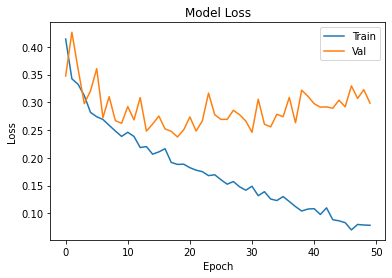

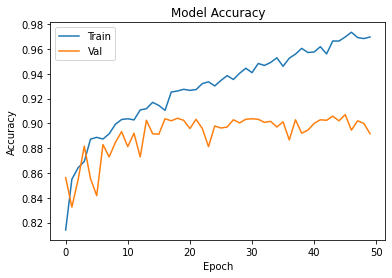


The Value Accuracy obtained for this model is:  0.907


In [56]:
# Plot your losses and accuracies
plot_losses(hist)
print()
plot_accuracies(hist)
print()
print("The Value Accuracy obtained for this model is: ", round(np.max(hist.history['val_accuracy']), 3))

### Question 2.2) Observation
How did your neural network perform? What hyperparameters and optimizer did you choose?

SEE BELOW GRAPHS TO SEE MY VALUE ACCURACY^

The network I made performed pretty good despite having over a million parameters to learn. You can see I was able to achieve around ~90% value accuracy. I was able to obtain these results with a network consisting of 4 layers. The first 3 layers are tanh and the last one is sigmoid. I chose tanh for this model because it is known to make approximations towards the origin and I thought this would help my model learn the data the best. The last layer is sigmoid because in this problem we were asked to be able to classify 2 objects either Pullovers or Coats and sigmoid is best at best at doing this type of binary classification as learned in the last assignment. Additionally, bce loss function was used in to support this type of binary classification problem as well. The optimizer I used was Adam(), I chose to do this one since it has worked pretty consistent in the past. I changed the hyperparameter of episilon= 0.003, its default value is 0.000001 so I increased this value a lot. The epsilon value is simply a small constant for numerical stability so that my results arent hopping around a lot from value to value which helped me reach the value accuracy that I did. 

### Question 2.3) Multi-class Neural Network

Next, we will build a neural network toimplement a multi-class classification. Remember that your input size is (784,) and the output layer needs 10 nodes (also remember that there is a certain activation function that needs to be encorporated with the output layer). See if your model can get about 70% classification accuracy.

**Hint: When compiling your model use loss=tf.keras.losses.[SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) 

In [73]:
from tensorflow.keras.layers import Input, Dense # only use these layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import * # you can use any optimizer


def build_model2():
  model = Sequential() 
  model.add(Dense(units=10, input_shape=(784,), activation='tanh'))
  model.add(Dense(units=10, activation='tanh'))
  model.add(Dense(units=10, activation='tanh'))
  model.add(Dense(units=10, activation='softmax'))
  model.add(Dense(units=10, activation='softmax'))
  model.add(Dense(units=10, activation='softmax'))

  return model

In [58]:
# Show a summary of your model
model = build_model2()
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
____________________________________________________

In [59]:
# Compile your model with your chosen optimizer, binary cross entropy for the loss, and accuracy as the metric

optimizer = Adam(learning_rate=1e-3, decay=1e-5)
model.compile(optimizer=optimizer,loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [36]:
# Call fit on your model passing in the train_images, train_labels data above with validation split of 0.2 and train for 100 epochs

hist = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
300/300 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.4996 - val_loss: nan - val_accuracy: 0.5058
Epoch 2/100
300/300 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.4985 - val_loss: nan - val_accuracy: 0.5058
Epoch 3/100
300/300 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.4985 - val_loss: nan - val_accuracy: 0.5058
Epoch 4/100
300/300 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.4985 - val_loss: nan - val_accuracy: 0.5058
Epoch 5/100
300/300 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.4985 - val_loss: nan - val_accuracy: 0.5058
Epoch 6/100
300/300 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.4985 - val_loss: nan - val_accuracy: 0.5058
Epoch 7/100
300/300 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.4985 - val_loss: nan - val_accuracy: 0.5058
Epoch 8/100
300/300 [====================

In [60]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()

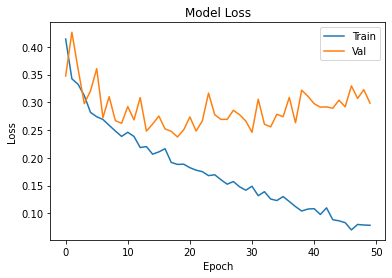

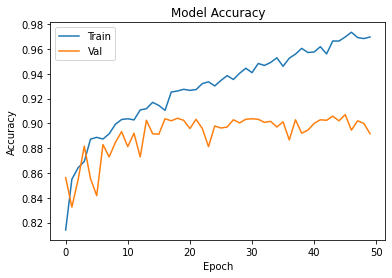


The Value Accuracy obtained for this model is:  0.907


In [61]:
# Plot your losses and accuracies

plot_losses(hist)
plot_accuracies(hist)
print()
print("The Value Accuracy obtained for this model is: ", round(np.max(hist.history['val_accuracy']), 3))


### Question 2.4) Observation
How did your neural network perform? What hyperparameters and optimizer did you choose?

SEE BELOW GRAPHS TO SEE MY VALUE ACCURACY^
TO GET ACCURATE RESULTS OF THIS MODEL YOU MUST RERUN THE CELLS THAT CREATED THE DATA

The network I made performed pretty well. You can see I was able to achieve around ~90% value accuracy. I was able to obtain these results with a network consisting of 6 layers. The first 4 layers are tanh and the last two are softmax. I chose tanh for this model because it is known to make approximations towards the origin and I thought this would help my model learn the data the best. The last two layers are softmax because in this problem we were asked to be able to classify multiple objects and softmax is best at best at doing this type of classification because it defines a probability distribution for the set of classes with probabilities that a certain image is of a object in one of the classes. Additionally, Sparse Categorical Crossentropy loss function was used in to support this classification problem. SCC is good for this problem since our labels are not one-hot encoded yet, i.e. our labels are integer values still. The optimizer I used was Adam(), I chose to do this one since it has worked pretty consistent in the past. I didnt change any of the hyperparameters because I felt that the value accuracy I obtained was good enough with the default values of the Adam() optimizer. 

## Question 3: Building a Convolutional Neural Network

In this exercise, we will build a classifier model that is able to distinguish between 10 different classes of images - airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. We will follow these steps:

1. Explore the example data
2. Build a small convnet to solve our classification problem
3. Evaluate training and validation accuracy

###  Data Exploration and Preparation

We'll start by downloading the CIFAR-10 dataset from Keras.

This is a link to the dataset documentation:
https://keras.io/datasets/#cifar10-small-image-classification

And a link to the dataset source:
https://www.cs.toronto.edu/~kriz/cifar.html

Be sure to set your Runtime environment to include a GPU, as it will speed up the training considerably (this time that's important!).

#### Loading data into local variables

In [62]:

from keras.datasets import cifar10

# Fetch the data:
(X, y), (_, _) = cifar10.load_data()

Using TensorFlow backend.


####  Import needed functions and libraries

In [63]:
# Ignore the warnings - Otherwise, TensorFlow tends to innundate one with far too many warnings.
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# For matrix operations and dataframes.
import numpy as np

# Data visualizaton.
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import random as rn
 
# Configure some defaults.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Useful deep learning functions.
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Powerful deep learning module.
import tensorflow as tf

# For dealing with data.
import numpy as np  

#### Data Preparation & Exploration
Let's take a look at a few of these images. Rerun this cell multiple times to see different images for each class.

You may notice that these images look low fidelity, which is because they are! As we increase our image size, we also increase our model complexity. What's important is that our classes are still distinguishable from each other.

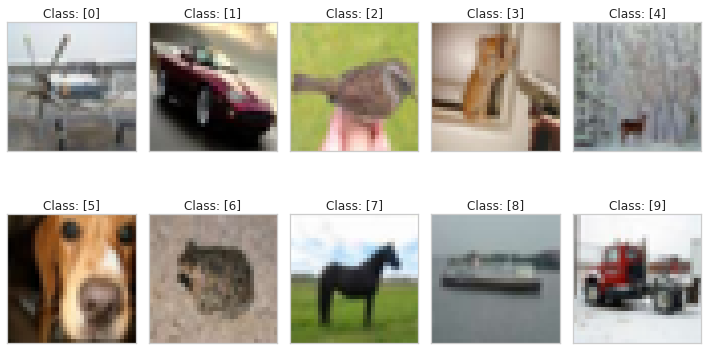

In [64]:
fig, ax = plt.subplots(2, 5)
fig.set_size_inches(10, 6)

for i in range(2):
    for j in range(5):
        c = j + 5*i # Class counter
        l = np.random.choice(np.where(y == c)[0], 1)[0] # Get a random image from class c
        ax[i, j].imshow(X[l])
        ax[i, j].set_title('Class: ' + str(y[l]))
        # Hide grid lines
        ax[i, j].grid(False)
        # Hide axes ticks
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        
plt.tight_layout()

#### Let's take a look at the format of our data

In [65]:
print('X (images)', X.shape)
print('y (classes)', y.shape)

# print(X)
# print()
# print()
# print()
# print(y)

X (images) (50000, 32, 32, 3)
y (classes) (50000, 1)


We can see that we have 50,000 samples, where each images is 32 by 32 pixels with 3 color channels: RGB.

For each of these images, we have a single label for which class they each belong to.

#### One-hot encode the labels, and normalize the data

Similarly to previous exercises, we want to one hot encode our class labels. We also want to normalize our image data similarly to the previous question.

In [66]:
# One-hot encode those integer values of class labels
y = to_categorical(y)


# Normalize all entries to the interval [0, 1]
def normalize_data(data):
    return (data - np.min(data))/(np.max(data) - np.min(data))

X = [normalize_data(image) for image in X]
X = np.array(X)




### Question 3.1)
Create your own deep learning architecture, and train it on the dataset above. If you're unsure where to start, begin by referencing the in class exercises. 

One suggestion is to add several convolution layers each followed by a maxpooling layer. Towards the end you can add one or more fully connected layers. Dropout layers are often useful after each fully connected layer for overfitting, and you can try experimenting with that parameter. Your model should be able to reach **70% validation accuracy**.

You are responsible for your model architecture, hyperparameters, and optimizer. 

**HOWEVER, you are limited to a maximum of 50 epochs and 500,000 model parameters! You will lose points for exceeding these limits.**

In [67]:
# This is where we define the architecture of our deep neural network.

model = Sequential()

model.add(Conv2D(filters = 64,      
                 kernel_size = (3, 3), 
                 activation = 'relu',
                 input_shape = (32, 32, 3)))


model.add(Conv2D(filters = 64,      
                 kernel_size = (3, 3), 
                 activation = 'relu'))



model.add(Conv2D(filters = 64,      
                 kernel_size = (3, 3), 
                 activation = 'relu'))


model.add(Dropout(0.20))
model.add(MaxPooling2D())


model.add(Conv2D(filters = 64,      
                 kernel_size = (3, 3), 
                 activation = 'relu'))

model.add(Conv2D(filters = 64,      
                 kernel_size = (3, 3), 
                 activation = 'relu'))

model.add(Conv2D(filters = 64,      
                 kernel_size = (3, 3), 
                 activation = 'relu'))



model.add(Dropout(0.20))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64, activation = 'relu')) 

model.add(Dense(20, activation = "relu"))

model.add(Dense(10, activation = "softmax"))



In [68]:
# A batch is the size of each training chunk. We're implementing batch gradient descent, which is in between
# stochastic gradient descent and full gradient descent.
batchsize = 100

# Each epoch goes through the entire training set once
epochs = 50

In [69]:
opt = Adam(learning_rate=1e-3, decay=1e-5)

# learning_rate=0.002, epsilon=0.0001

# RMSprop(momentum=0.09, learning_rate=0.003)
# SGD(
    # learning_rate=0.01, momentum=0.0
model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [70]:
model.summary()
# MAXIMUM OF 500,000 PARAMETERS!

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 64)         

In [71]:
history = model.fit(X, 
                    y,
                    batch_size = batchsize,
                    epochs = epochs, 
                    validation_split = 0.2, # DON'T CHANGE validation_split!
                    verbose = 1)

Epoch 1/50
400/400 [==============================] - 15s 39ms/step - loss: 1.7870 - accuracy: 0.3401 - val_loss: 1.5862 - val_accuracy: 0.4198
Epoch 2/50
400/400 [==============================] - 15s 38ms/step - loss: 1.3829 - accuracy: 0.4949 - val_loss: 1.3424 - val_accuracy: 0.5342
Epoch 3/50
400/400 [==============================] - 15s 38ms/step - loss: 1.2019 - accuracy: 0.5703 - val_loss: 1.1916 - val_accuracy: 0.5943
Epoch 4/50
400/400 [==============================] - 15s 38ms/step - loss: 1.0824 - accuracy: 0.6141 - val_loss: 1.0860 - val_accuracy: 0.6227
Epoch 5/50
400/400 [==============================] - 15s 38ms/step - loss: 0.9894 - accuracy: 0.6473 - val_loss: 1.0111 - val_accuracy: 0.6561
Epoch 6/50
400/400 [==============================] - 15s 38ms/step - loss: 0.9088 - accuracy: 0.6781 - val_loss: 0.9555 - val_accuracy: 0.6678
Epoch 7/50
400/400 [==============================] - 15s 38ms/step - loss: 0.8399 - accuracy: 0.7027 - val_loss: 0.8818 - val_accuracy:

### Question 3.2)
Create training and validation loss and accuracy plots as above.

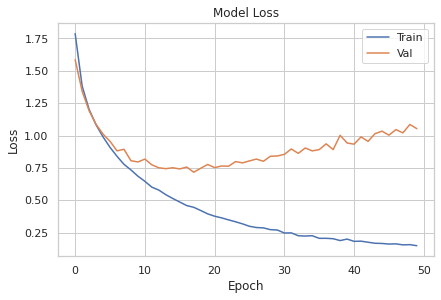

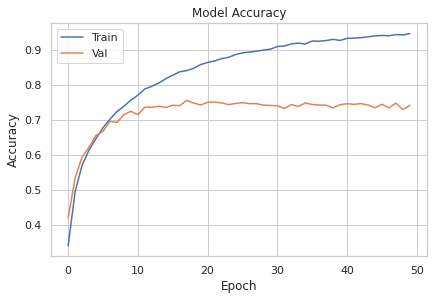


The Value Accuracy obtained for this model is:  0.756


In [72]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()


plot_losses(history)
print()
plot_accuracies(history)
print()
print("The Value Accuracy obtained for this model is: ", round(np.max(history.history['val_accuracy']), 3))



SEE BELOW GRAPHS TO SEE MY VALUE ACCURACY^

The network I made performed pretty well. You can see I was able to achieve around ~75% value accuracy. I was able to obtain these results with a network consisting of 14 layers totaling in 224,870 trainable parameters. I layered my CNN like suggested in class by covolving the image through a number of filters then MaxPooling to extract features that exist in any size and place of my image. Next I do some drop out to tidy up my network and make it thinner and less computationally dense during runtime. I used all relu activation functions for my convolutional layers because it handles the learning of our model and prevents a vanishing gradient descent well. I then flatten/vectorize my results and passed the data to a fully connected neural network. I used tanh per usual because I have had good luck with it in the past then used softmax as the output layer to define a distribution for the neural network to classify the images after all the convolving etc has happened. The optimizer I used again was the Adam optimizer. I noticed my model was hopping around a lot so I increased the hyperparameter so that learning_rate=1e-3 and decay=1e-5 which helped stabilized. Additionally, since our labels are now vectorized, it would be appropriate to use Categorical Cross Entropy as our loss function. I was happy with the results I got. I messed around with different optimizers like SGD and RMSprop and nothing worked as well as the Adam() optimizer did. My model also performed better with a smaller batch size. 